![agents](images/header.jpg)
# Análisis de textos imprecisos
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/8.%20Desambiguación%20I.ipynb)

## Lógica difusa

Una forma particularmente frecuente de imprecisión en el lenguaje se presenta en aquellos enunciados en los que no está clara la extensión de aplicabilidad de un concepto. A esta situación le llamamos **vaguedad**. Formalmente, es posible establecer una distinción entre ambigüedad y vaguedad; utilizamos el término de ambigüedad, para aquellas situaciones en las que la interpretación de una palabra o una frase ofrece varias alternativas, mientras que la vaguedad se referiría a la falta de precisión del lenguaje. Sin embargo, el hecho de que podamos utilizar el término *viejo/a* para referirse a una película de hace 20 años y *nuevo* para referirse a libros escritos en los primeros años posteriores a la muerte de Jesús de Nazareth (el Nuevo Testamento) o *caliente* para referirse a una temperatura ambiente de 35<sup>o</sup>C y *tibio* para referirse a la temperatura de un café a menos de 70-60<sup>o</sup>C, hace evidente una estrecha relación entre *ambigüedad* y *vaguedad*.

### Paradoja sorites
La vaguedad en el lenguaje suele describirse mediante la llamada *paradoja del montón* (o paradoja sorites), que en su forma más común puede expresarse de la siguiente manera: Supongamos que tenemos un montón de arena... digamos con un millón de granos

![](images/sorites.jpg)

Si removemos un sólo grano de arena del montón ahora tenemos 999,999 granos, lo cual es aún un montón; si removemos otro grano de arena, seguimos teniendo un montón de arena, ahora con 999,998 granos. Si continuamos este proceso, retirando un grano de arena a la vez, eventualmente tendremos un sólo grano de arena que, evidentemente, no es un montón: Entonces, ¿en qué punto dejó de ser un montón?

Otras variantes de esta paradoja hacen referencia a la oposición entre pequeños cambios y grandes consecuencias, por ejemplo, los puntos cercanos en una escala de colores son indistinguibles para el ojo humano, pero si observamos puntos suficientemente separados la diferencia es evidente, por ejemplo, los puntos en un extremo de la escala son rojos, mientras que en el extremo opuesto son azules:

![](images/sorites2.png)

El hecho de que una secuencia de puntos (localmente) indistinguibles contenga puntos completamente diferenciados, plantea la paradoja. Este tipo de paradojas se presentan comúnmente en el lenguaje cotidiano y es consecuencia de representar una escala continua mediante un conjunto de conceptos discretos, por ejemplo, {*pequeño*, *alto*}

![](images/sorites3.jpg)

o {*joven*, *viejo*}

![](images/sorites4.jpg)

Cada uno de estos conceptos representa un conjunto al que pertenecen los elementos que cumplen con ciertas condiciones, por ejemplo, todos los individuos de "*corta*" estatura pertenecen al conjunto *pequeño*, mientras que los de *gran* estatura pertenecen al conjunto *alto*. Al utilizar elementos diferenciados por un valor de escala, es necesario tomar una decisión de cómo dividir el universo de observaciones en los conjuntos disponibles:

![](images/sorites3b.jpg)

Una manera común de (intentar) resolver estas paradojas es utilizar modificadores como "*poco*" y "*mucho*", a la manera de una [escala de Likert](https://en.wikipedia.org/wiki/Likert_scale), por ejemplo, el caso de estaturas puede replantearse mediante la escala de valores lingüísticos:

<code>{"Muy pequeño", "Pequeño", "Mediano", "Alto", "Muy alto"}</code>

Sin embargo, esta estrategia, aunque común, suele agregar más imprecisión al lenguaje, al no quedar claro cuando usar el modificador y cuando prescindir de él.


### Conjuntos difusos

Los conjuntos difusos pueden considerarse como una extensión de los conjuntos clásicos (estrictos/*crisp*). En los conjuntos clásicos, un elemento pertenece (por completo) al conjunto o no pertenece (en absoluto) al conjunto. Para un conjunto (clásico) $A$, se define su complemento como el conjunto formado por todos los elementos en el universo, $U$, que no pertenecen a $A$, $A^c = \{x\in U\ |\ x\not\in A\}$, es decir, un elemento pertenece al un conjunto estricto $A$ o pertenece a su complemento, pero no a ambos ($A\cap A^c = \phi$), lo cual equivale en lógica a la ley del tercero excluido: Si una frase es cierta, entonces su negación es falsa y viceversa. 

Los conjuntos difusos, por otra parte, se definen a través de funciones continuas de pertenencia en el rango $[0, 1]$, es decir, los elementos de un conjunto difuso pueden no pertenecer (en absoluto) al conjunto (pertenencia igual a acero), o pueden pertenecer por completo al conjunto (pertenencia igual a 1) o pueden tener valores parciales de pertenencia. En consecuencia, un elemento dado puede pertenecer lo mismo al conjunto difuso que a su complemento. Por ejemplo, para el caso de la edad, podemos describir el problema mediante los conjuntos difusos "*Joven*" y "*Viejo*", como se muestra a continuación:

![](images/fuzzy02.png)

Aquí, el concepto *Joven* es modelado por un conjunto difuso trapezoidal. 

![](images/fuzzy04.png)

De acuerdo con este conjunto, una persona de hasta 25 años es "*definitivamente*" joven, lo cual corresponde a un valor de pertenencia de 1.0. Por otra parte, la pertenencia de una persona al conjunto "*Joven*" empieza a declinar gradualmente desde los 25 años hasta llegar a los 75 años, a partir de cuándo "*definitivamente*" no es joven, es decir, su pertenencia en el conjunto difuso "*Joven*" es cero. El conjunto difuso "*Viejo*", por su parte, también es modelado con un conjunto difuso trapezoidal, en dirección contraria. De acuerdo con este modelo, una persona con edad inferior a 25 años, "*definitivamente*" no es viejo, lo que corresponde a una pertenencia de cero en el conjunto difuso "*Viejo*". A partir de los 25 años, empieza a pertenecer cada vez más al conjunto difuso "*Viejo*", hasta que, a partir de los 75 años es "*definitivamente*" viejo. Otro aspecto  resaltar, en este modelo, es que, una persona con edad entre 25 y 75 años pertenece, simultáneamente, tanto al conjunto difuso "*Joven*" como al conjunto difuso "*Viejo*". De esta manera, se "*elimina*" la paradoja sorites, aunque sigue habiendo dos momentos en que deben tomarse decisiones estrictas: A los 25 años (cumplidos) se inicia el "*envejecimiento*" y este proceso concluye a los 75 años. Una alternativa para evitar esta decisión arbitraria es utilizar conjuntos triangulares: 

![](images/fuzzy05.png)

En este caso, el modelo establece que el paso del conjunto difuso "*Joven*" al conjunto difuso "*Viejo*" es gradual y a lo largo de todo el rango de valores (aquí considerado, arbitrariamente, ente cero y cien años)

> “*Lo que llamáis morir es acabar de morir y lo que llamáis nacer es empezar a morir y lo que llamáis vivir es morir viviendo*”. Los sueños, Franciso de Quevedo

Una forma más natural para describir un concepto mediante conjuntos difusos, es mediante funciones logísticas:

![](images/fuzzy06.png)

En este caso, aunque el paso del conjunto difuso "*Joven*" al conjunto difuso "*Viejo*" es también gradual, no es lineal: la persona empieza a envejecer al nacer, pero el paso no es "*notorio*" hasta pasados los 20 años y conforme se cumplen más años el proceso se acelera, particularmente al rebasar los 50 años :-|. 

Aunque los conjuntos difusos ofrecen una representación más natural de los conceptos lógicos y de las etiquetas lingüísticas, su costo computacional es muy superior al de los conjuntos basados en líneas rectas, por lo que es muy usual preferir el uso de conjuntos triangulares y trapezoidales.

De la misma manera, representamos ahora el concepto de estatura, en esta ocasión utilizando tres conjuntos difusos trapezoidales:

![](images/fuzzy03.png)

Aunque no existe una nomenclatura universal para definir las características de los conjuntos difusos, se suelen utilizar los siguientes conceptos:

![](images/fuzzy07.png)

* El **universo de discurso** es el conjunto de todos los valores sobre los que se define el conjunto difuso.

* El **borde inferior** es el límite izquierdo de valores que pertenecen al conjunto.

* El **borde superior** es el límite derecho de valores que pertenecen al conjunto.

* El **soporte** es el conjunto de todos los puntos que pertenecen al conjunto difuso, desde el borde inferior hasta el borde superior, incluídos éstos.

* El **valor modal** es el punto donde la función de pertenencia tiene valor 1.0 (o el valor máximo, lo que correspondería, como analogía, al valor más frecuente en el caso estadístico). Es de especial utilidad para describir conjuntos definidos alrededor de un valor, como es el caso de los conjuntos triangulares. Si el conjunto es simétrico, el valor modal coincide con el centro del conjunto.

* El **núcleo** se utiliza para describir conjuntos que poseen una "*meceta*" (puntos consecutivas con pertenencia 1, como es el caso de los conjuntos trapezoidales; el núcleo es el ancho de esa meceta.

* El **punto de cruce** es cualquiera de los puntos donde la función de pertenencia toma el valor 0.5

* El **ancho de banda** es el conjunto de valores entre los dos puntos de cruce, en conjuntos difusos que tienen dos y sólo dos puntos de cruce.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [1]:
class TriangFS:
    def __init__(self, mod, sup):
        self.modal = mod
        self.a = mod - sup/2
        self.b = mod + sup/2
        self.m = 2 / sup
        
    def mu(self, x):
        if x < self.a:
            return 0
        elif x < self.modal:
            return self.m * (x - self.a)
        elif x < self.b:
            return self.m * (self.b - x)
        else:
            return 0

        
xvals = np.arange(0, 10.0, 0.01)
yvals = 3 * [0]

set_A = TriangFS(2.5, 4.0)
yvals[0] = [set_A.mu(x) for x in xvals]

set_B = TriangFS(4.5, 4.0)
yvals[1] = [set_B.mu(x) for x in xvals]

set_C = TriangFS(6.5, 4.0)
yvals[2] = [set_C.mu(x) for x in xvals]

plt.plot(xvals, yvals[0])
plt.plot(xvals, yvals[1]) 
plt.plot(xvals, yvals[2])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))

plt.xlabel('x')
plt.ylabel('Pertenencia')
plt.title('Conjuntos difusos triangulares')
plt.grid(True)
plt.show()

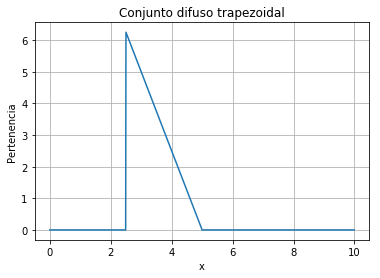

In [8]:
class TrapezFS:
    def __init__(self, inf, a, b, sup):
        self.a = a
        self.b = b
        self.inf = inf
        self.sup = sup
        self.ma = a / (inf-a)
        self.mb = b / (sup-b)

    def mu(self, x):
        if x < self.a:
            return 0
        elif x < self.a:
            return self.ma * (x - self.a)
        elif x < self.b:
            return 1.0
        elif x < self.sup:
            return self.mb * (self.b - x)
        else:
            return 0

        
set_A = TrapezFS(0, 2.5, 5, 7)
xvals = np.arange(0, 10.0, 0.01)
yvals = [set_A.mu(x) for x in xvals]

plt.plot(xvals, yvals)

plt.xlabel('x')
plt.ylabel('Pertenencia')
plt.title('Conjunto difuso trapezoidal')
plt.grid(True)
plt.show()

In [6]:
# pip install fuzzywuzzy[speedup]

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

print("Similaridad entre dos cadenas: {}%".format( 
      fuzz.ratio("Esta es una prueba", "Esta es una prueba!")))

print("Similaridad parcial entre dos cadenas: {}%".format( 
      fuzz.partial_ratio("Esta es una prueba", "Esta es una prueba!")))



Similaridad entre dos cadenas: 97%
Similaridad parcial entre dos cadenas: 100%


Discutir Likert-Fuzzy

https://www.tutorialspoint.com/fuzzy_logic/fuzzy_logic_introduction.htm
    
https://marcobonzanini.com/2015/02/25/fuzzy-string-matching-in-python/